In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('diamond.csv')

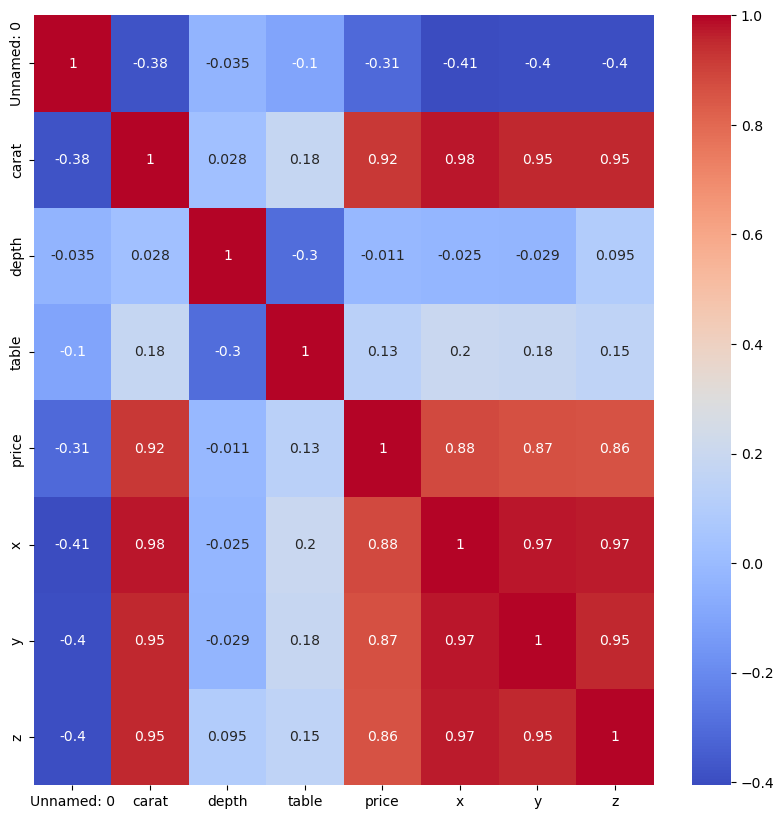

In [3]:
corr = df.corr()
 
plt.figure(figsize=(10, 10)) 
sns.heatmap(corr.iloc[:16,:16], annot=True, cmap='coolwarm')
plt.show()



 







In [12]:
from sklearn.model_selection import train_test_split

df=df.dropna()
X = df[['registered' , 'casual', 'atemp','temp','instant']]
y = df['cnt']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [14]:
import tensorflow as tf 
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=[len(x_train.keys())]),
        tf.keras.layers.Dense(64, activation='relu'),
         
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])
    model.fit(x_train,y_train,epochs =40,batch_size=32,verbose=2)
    return model
model = build_model()
model.summary()

Epoch 1/40
19/19 - 2s - loss: 25473728.0000 - mae: 4641.6470 - mse: 25473728.0000 - 2s/epoch - 92ms/step
Epoch 2/40
19/19 - 0s - loss: 10042862.0000 - mae: 2862.9653 - mse: 10042862.0000 - 67ms/epoch - 4ms/step
Epoch 3/40
19/19 - 0s - loss: 1490559.0000 - mae: 1004.5181 - mse: 1490559.0000 - 45ms/epoch - 2ms/step
Epoch 4/40
19/19 - 0s - loss: 67662.7031 - mae: 212.7500 - mse: 67662.7031 - 62ms/epoch - 3ms/step
Epoch 5/40
19/19 - 0s - loss: 33258.1445 - mae: 142.7132 - mse: 33258.1445 - 50ms/epoch - 3ms/step
Epoch 6/40
19/19 - 0s - loss: 12268.2061 - mae: 89.1555 - mse: 12268.2061 - 50ms/epoch - 3ms/step
Epoch 7/40
19/19 - 0s - loss: 8632.6855 - mae: 74.5960 - mse: 8632.6855 - 50ms/epoch - 3ms/step
Epoch 8/40
19/19 - 0s - loss: 7218.5889 - mae: 66.7478 - mse: 7218.5889 - 53ms/epoch - 3ms/step
Epoch 9/40
19/19 - 0s - loss: 6198.4922 - mae: 62.8315 - mse: 6198.4922 - 57ms/epoch - 3ms/step
Epoch 10/40
19/19 - 0s - loss: 4799.6895 - mae: 55.1007 - mse: 4799.6895 - 53ms/epoch - 3ms/step
Epoc

In [15]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=0)
y_pred = model.predict(x_test)
print('Loss:', loss)
print('MAE:', mae)
print('RMSE:', np.sqrt(mse))
print('R^2 score:', r2_score(y_test, y_pred))

5/5 [==============================] - 0s 3ms/step
Loss: 227.32797241210938
MAE: 8.202472686767578
RMSE: 15.07739939154327
R^2 score: 0.9999433081017509


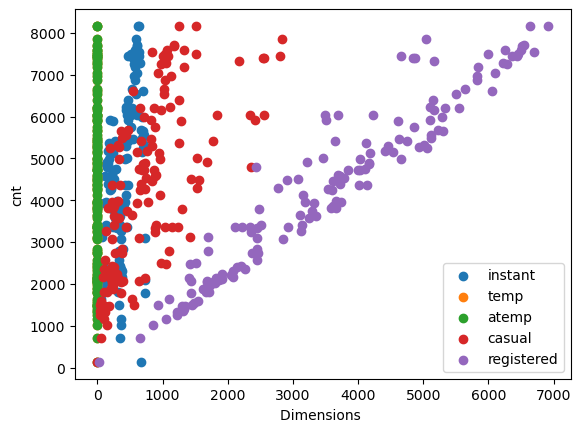

In [8]:
fig, ax = plt.subplots()

ax.scatter(x_test['instant'],y_pred, label='instant')
ax.scatter(x_test['temp'],y_pred, label='temp')
ax.scatter(x_test['atemp'], y_pred, label='atemp')
ax.scatter(x_test['casual'],y_pred, label='casual')
ax.scatter(x_test['registered'],y_pred, label='registered')



ax.set_xlabel('Dimensions ')
ax.set_ylabel('cnt')
ax.legend()

plt.show()


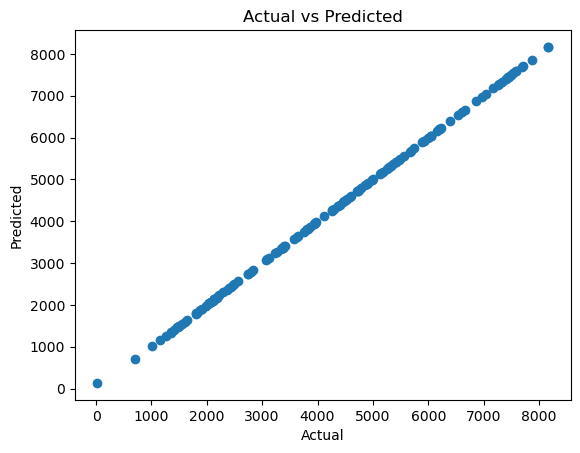

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()
